<a href="https://colab.research.google.com/github/Yan-Lihui/ucb/blob/master/Lab_2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [1]:
NAME = "Lihui Yan"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- Questions can be either autograded and manually graded.
- The type of question and the points they carry are indicated in each question cell
- An autograded question has 3 cells
     - **Question cell** : Read only cell containing the question
     - **Code Cell** : This is where you write the code
     - **Grading cell** : This is where the grading occurs, and **you are required not to edit this cell**
- Manually graded questions only have the question and code cells.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out! 
- You can delete the `raise NotImplementedError()` for all manually graded questions.
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to canvas. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding! 

In [2]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')



#DOWNLOADING DATASET
!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
!unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

--2020-08-03 09:52:38--  http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12350863 (12M) [application/zip]
Saving to: ‘yelp_reviewers.zip’

yelp_reviewers.zip  100%[===================>]  11.78M  1.93MB/s    in 7.5s    

2020-08-03 09:52:46 (1.58 MB/s) - ‘yelp_reviewers.zip’ saved [12350863/12350863]

Archive:  yelp_reviewers.zip
  inflating: yelp_reviewers.csv      
Dataset Downloaded: yelp_reviewers.csv
                q3           q4  ...        q16ab        q16ac
count  7177.000000  7177.000000  ...  7177.000000  7177.000000
mean      6.838651     5.281455  ...     1.127751     3.649254
std       7.597977    16.208703  ...     4.652206     0.977100
min       1.000000     1.000000  ...     0.000000     1.000000
25%      

In [ ]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0,0,0,0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. 


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder.


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_te

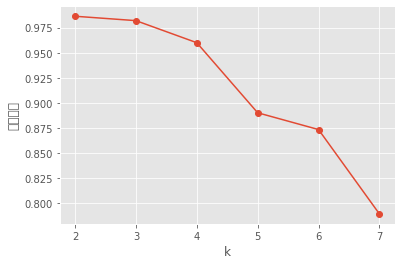

None


In [33]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q1(df):
  Scores = []  # 存放轮廓系数
  for k in range(2,8):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(df[['q4','q5','q6']])
    Scores.append(silhouette_score(df[['q4','q5','q6']],estimator.labels_,metric='euclidean'))
  X = range(2,8)
  plt.xlabel('k')
  plt.ylabel('轮廓系数')
  plt.plot(X,Scores,'o-')
  plt.show()
    # YOUR CODE HERE
print(q1(df))

What is the best choice of k? 

In [35]:
# YOUR ANSWER HERE
k=2

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8. 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_te

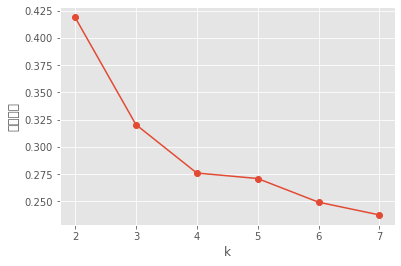

None


In [61]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q2(df):
  df = df[['q7', 'q8', 'q9', 'q10']]
  df = df.dropna()

  df=df.dropna(axis=0, how='any', thresh=None, subset=None,
           inplace=False)
  Scores = []  # 存放轮廓系数
  for k in range(2,8):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(df[['q7','q8','q9','q10']])
    Scores.append(silhouette_score(df[['q7','q8','q9','q10']],estimator.labels_,metric='euclidean'))
  X = range(2,8)
  plt.xlabel('k')
  plt.ylabel('轮廓系数')
  plt.plot(X,Scores,'o-')
  plt.show() 
    # YOUR CODE HERE
    
print(q2(df))

What is the best choice of k? 

In [62]:
# YOUR ANSWER HERE
2


2

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8. 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_te

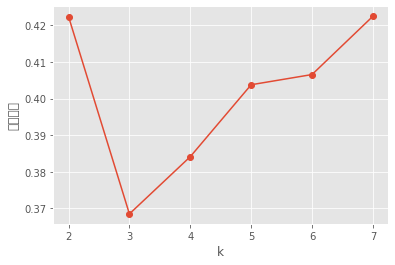

None


In [47]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q3(df):
  df=df.dropna(axis=0, how='any', thresh=None, subset=None,
           inplace=False)
  Scores = []  # 存放轮廓系数
  for k in range(2,8):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(df[['q11','q12','q13']])
    Scores.append(silhouette_score(df[['q11','q12','q13']],estimator.labels_,metric='euclidean'))
  X = range(2,8)
  plt.xlabel('k')
  plt.ylabel('轮廓系数')
  plt.plot(X,Scores,'o-')
  plt.show() 
    # YOUR CODE HERE
  
print(q3(df))

What is the best choice of k?

In [53]:
# YOUR ANSWER HERE
7

7

### Question 4 `(1 point)`
Consider the best cluster from Question 3 and List the number of data points in each cluster.

In [59]:
#Make sure you return the answer value in this function
#The return value must be an dictionary. Eg : {0:1000,1:500,2:1460}
def q4(df):
  

    # YOUR CODE HERE
    raise NotImplementedError()

In [60]:
#This is an autograded cell, do not edit
print(q4(df))

AttributeError: ignored

### Question 5 `(1 point)`
Consider the best cluster from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless etc)?  If so, print the center of that cluster.

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q5(df):
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
#This is an autograded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

### Question 6 `(1 point)`
Consider the best cluster from Question 3. How many reviewers were in the cluster that represented relatively equal strength in all voting categories

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q6(df):
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
#This is an autograded cell, do not edit
print(q6(df))

### Question 7 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
#Make sure you return the answer value in this function
#The return value must be a float
def q7(df):
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
#This is an autograded cell, do not edit
print(q7(df))

### Question 8 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).

What was the average q3 among the points in each of the clusters?

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q8(df):
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
#This is an autograded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

### Question 9 `(2 points)`
**This question will be manually graded.**

Cluster the dataset using all features in the dataset

We can drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features. Let's do that now.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [ ]:
# YOUR CODE HERE

It looks like q8 - q13 and q16ab have a lot of null values, especially q8 and q9. Let's see what the impact is of removing some of these columns before removing any columns

In [ ]:
# YOUR CODE HERE

By removing 2 features, we effectively have double the number of rows remaining. That's pretty good.  
Preprocess categorical variables to dummy values.

In [ ]:
# YOUR CODE HERE

Now normalize the remaining values

In [ ]:
# YOUR CODE HERE

Using the the `sum of within cluster variance` metric with the elbow method what was the best k?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Question 10 `(1 points)`
**This question will be manually graded.**

For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe in short the question, and how clustering can answer that question.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Bonus question (`2 Points`) - Reviewer overlap:
- Download last week's dataset
- Aggregate cool, funny and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed. (You may need to use the pivot function) 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()